In [3]:
%load_ext autoreload
%autoreload 2

In [29]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


import os
os.chdir(r"D:\coding\Jupyter_notebooks\ML")

from credit_risk.read_data import read_data_train
from credit_risk.transform_pipeline import data_prepare_pipeline

In [7]:
data_original = read_data_train()

In [27]:
data = data_prepare_pipeline.fit_transform(data_original.copy(deep=True))

D:\coding\Jupyter_notebooks\envML\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [28]:
data_prepare_pipeline.steps[-2][1].kmeans.cluster_centers_

array([[ 60857.89571131],
       [ 88187.13703583],
       [112561.27463231],
       [134525.7484646 ],
       [157674.22897335],
       [179580.87865815],
       [201811.20850169]])

In [ ]:
dt = pd.DataFrame()
dt["unclusterized"] = data_original["AMT_INCOME_TOTAL"]
dt["clusters"] = data["AMT_INCOME_TOTAL"]

sn.histplot(x="unclusterized", hue="clusters", data=dt.sample(10000))

In [ ]:
data["AMT_INCOME_TOTAL"].value_counts()

In [ ]:
data.columns

In [ ]:
data["CODE_GENDER"].value_counts()

In [ ]:
data.describe(include="all")

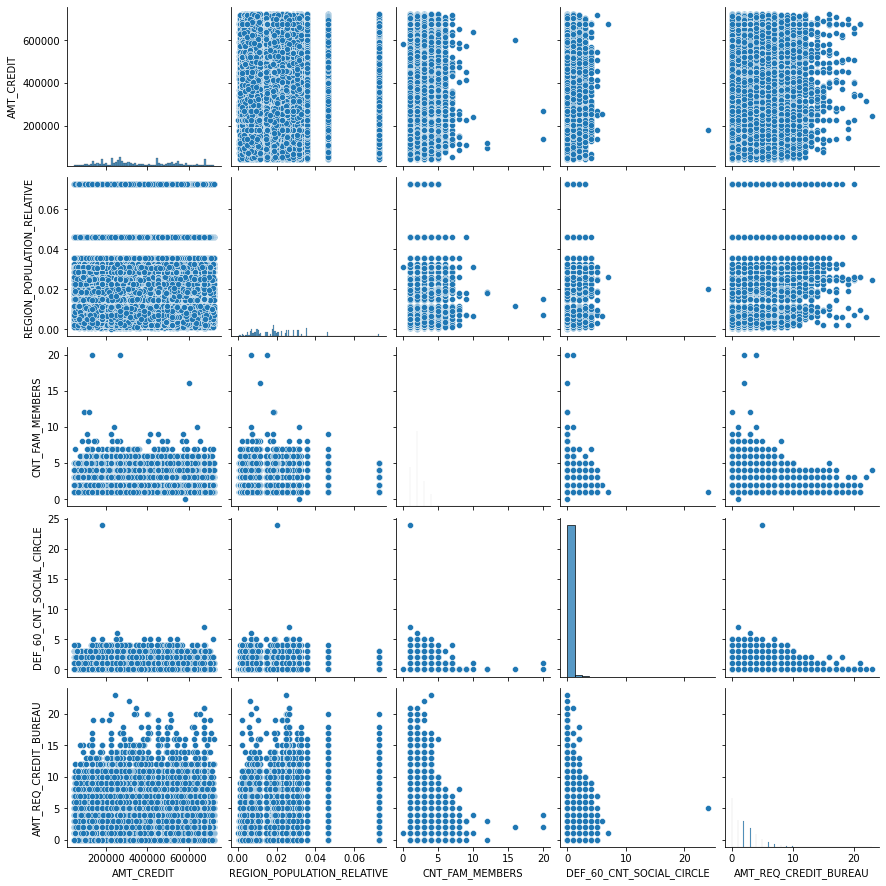

In [14]:
sn.pairplot(data.select_dtypes("number"))

In [ ]:
sn.countplot(x="CODE_GENDER", data=data)

In [ ]:
np.where(data["CODE_GENDER"] == "XNA")

In [ ]:
sn.countplot(x="TARGET", data=data)

In [ ]:
feat_income_total = "AMT_INCOME_TOTAL"
sn.violinplot(x=feat_income_total, data=data)

In [17]:
sn.boxplot(x=feat_income_total, data=data)

TypeError: Horizontal orientation requires numeric `x` variable.

In [ ]:
data[feat_income_total].describe()

In [21]:
numerical_columns = data.select_dtypes("number").columns
numerical_columns

Index(['AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU'],
      dtype='object')

In [ ]:
sn.histplot(x="AMT_CREDIT", data=data)

<AxesSubplot:xlabel='DEF_60_CNT_SOCIAL_CIRCLE'>

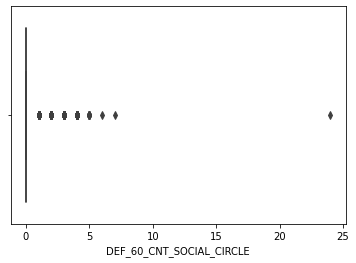

In [22]:
sn.boxplot(x="DEF_60_CNT_SOCIAL_CIRCLE", data=data)

In [ ]:
data["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts()

In [23]:
data["DEF_60_CNT_SOCIAL_CIRCLE"].describe()

count    177039.000000
mean          0.107891
std           0.378331
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

<AxesSubplot:xlabel='DEF_60_CNT_SOCIAL_CIRCLE', ylabel='count'>

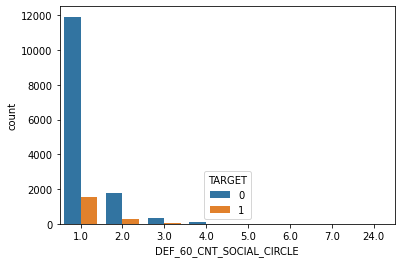

In [25]:
sn.countplot(x="DEF_60_CNT_SOCIAL_CIRCLE", hue="TARGET", data=data[data["DEF_60_CNT_SOCIAL_CIRCLE"] > 0])

In [ ]:
sn.scatterplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", hue="TARGET", data=data)

In [ ]:
fig, axis = plt.subplots(nrows=len(numerical_columns))
fig.set_size_inches(10, 10 * len(numerical_columns))

for col, i in zip(numerical_columns, range(len(numerical_columns))):
    sn.boxplot(x=col, data=data, ax=axis[i])

In [11]:
data["AMT_INCOME_TOTAL"]

0         6
2         0
3         3
4         2
5         1
         ..
307506    4
307507    0
307508    4
307509    5
307510    4
Name: AMT_INCOME_TOTAL, Length: 177039, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]